## Answer 1

In [1]:
# Download GDPC1.csv
# Please download manually

In [1]:
import pandas as pd

# Read dataset
df = pd.read_csv("GDPC1.csv")

# Convert DATE column to datetime if it's not already in datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Shift GDPC1 column by 4 rows to get value from one year ago
df['GDPC1_one_year_ago'] = df['GDPC1'].shift(4)

# Calculate YoY growth rate
df['YoY_growth'] = df['GDPC1'] / df['GDPC1_one_year_ago'] - 1

# Filter dataframe to include only rows from 2023
df_2023 = df[df['DATE'].dt.year == 2023]

# Calculate average YoY growth rate for 2023
average_YoY_growth_2023 = df_2023['YoY_growth'].mean()

# Round to 1 decimal point
average_YoY_growth_2023_rounded = round(average_YoY_growth_2023 * 100, 1)

print("Average YoY growth rate in 2023: {}%".format(average_YoY_growth_2023_rounded))

Average YoY growth rate in 2023: 2.5%


## Answer 2

In [1]:
import pandas as pd

# Download DGS2 and DGS10 interest rates series
dgs2_url  = "https://fred.stlouisfed.org/series/DGS2/downloaddata/DGS2.csv"
dgs10_url = "https://fred.stlouisfed.org/series/DGS10/downloaddata/DGS10.csv"

In [2]:
# Read data into pandas dataframes
dgs2 = pd.read_csv(dgs2_url, parse_dates=['DATE'], index_col='DATE')
dgs10 = pd.read_csv(dgs10_url, parse_dates=['DATE'], index_col='DATE')

In [3]:
# Join the dataframes on date
df = dgs10.join(dgs2, lsuffix='_dgs10', rsuffix='_dgs2')

In [4]:
df.iloc[3784,:]

VALUE_dgs10    .
VALUE_dgs2     .
Name: 1976-07-05 00:00:00, dtype: object

In [5]:
# drop all rows that contain '.' character
df = df.drop(df[df['VALUE_dgs10'] == '.'].index)

In [6]:
# drop all rows that contain '.' character
df = df.drop(df[df['VALUE_dgs2'] == '.'].index)

In [7]:
df.fillna(0, inplace=True)

In [8]:
df

,VALUE_dgs10,VALUE_dgs2
DATE,,
1962-01-02,4.06,0
1962-01-03,4.03,0
1962-01-04,3.99,0
1962-01-05,4.02,0
1962-01-08,4.03,0
...,...,...
2024-04-05,4.39,4.73
2024-04-08,4.42,4.78
2024-04-09,4.36,4.74


In [9]:
df['VALUE_dgs10'] = pd.to_numeric(df['VALUE_dgs10'])
df['VALUE_dgs2'] = pd.to_numeric(df['VALUE_dgs2'])

In [10]:
df.dtypes

VALUE_dgs10    float64
VALUE_dgs2     float64
dtype: object

In [11]:
# Calculate the difference dgs10 - dgs2 daily
df['difference'] = df['VALUE_dgs10'] - df['VALUE_dgs2']

In [12]:
df['difference'] 

DATE
1962-01-02    4.06
1962-01-03    4.03
1962-01-04    3.99
1962-01-05    4.02
1962-01-08    4.03
              ... 
2024-04-05   -0.34
2024-04-08   -0.36
2024-04-09   -0.38
2024-04-10   -0.42
2024-04-11   -0.37
Name: difference, Length: 15555, dtype: float64

In [13]:
# Filter data since year 2000
df_since_2000 = df[df.index >= '2000-01-01']

# Find the minimum value of the difference
min_difference = df_since_2000['difference'].min()

# Round to 1 decimal point
min_difference_rounded = round(min_difference, 1)

print("Minimum value of (dgs10 - dgs2) since 2000: {}".format(min_difference_rounded))

Minimum value of (dgs10 - dgs2) since 2000: -1.1


## Answer 3

In [1]:
import yfinance as yf

# Download data for S&P 500 (^GSPC) and IPC Mexico (^MXX) indexes
sp500 = yf.download('^GSPC', start='2019-04-09', end='2024-04-09')['Adj Close']
ipc_mexico = yf.download('^MXX', start='2019-04-09', end='2024-04-09')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [2]:
# Calculate the 5-year growth for both indexes
sp500_growth = (sp500.iloc[-1] / sp500.iloc[0] - 1) * 100
ipc_mexico_growth = (ipc_mexico.iloc[-1] / ipc_mexico.iloc[0] - 1) * 100

In [3]:
# Determine which index has the highest growth
if sp500_growth > ipc_mexico_growth:
    largest_growth = round(sp500_growth)
    index_name = "S&P 500"
else:
    largest_growth = round(ipc_mexico_growth)
    index_name = "IPC Mexico"

print("The index with the largest 5-year growth is {} with a growth of {}%.".format(index_name, largest_growth))

The index with the largest 5-year growth is S&P 500 with a growth of 81%.


## Answer 4

In [1]:
import yfinance as yf

# List of selected stocks
stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Download 2023 daily OHLCV data for each stock
stock_data = {}
for stock in stocks:
    stock_data[stock] = yf.download(stock, start='2023-01-01', end='2023-12-31')

# Calculate maximum-minimum "Adj.Close" price for each stock and divide by the maximum "Adj.Close" value
max_range_ratio = 0
max_range_stock = None
for stock, data in stock_data.items():
    max_adj_close = data['Adj Close'].max()
    min_adj_close = data['Adj Close'].min()
    range_ratio = (max_adj_close - min_adj_close) / max_adj_close
    if range_ratio > max_range_ratio:
        max_range_ratio = range_ratio
        max_range_stock = stock

# Round the result to two decimal places
max_range_ratio_rounded = round(max_range_ratio, 2)

print("The largest range ratio in 2023 is {} for stock {}.".format(max_range_ratio_rounded, max_range_stock))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

The largest range ratio in 2023 is 0.42 for stock MSFT.


## Answer 5

In [1]:
import yfinance as yf

# List of selected stocks
stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Dictionary to store dividends paid by each stock
dividends_paid = {}

# Loop through each stock and download dividends paid in 2023
for stock in stocks:
    stock_info = yf.Ticker(stock)
    dividends = stock_info.dividends
    dividends_2023 = dividends.loc['2023']
    total_dividends = dividends_2023.sum()
    dividends_paid[stock] = total_dividends

# Dictionary to store the closing price of each stock at the last trading day of the year
closing_prices = {}

# Loop through each stock and download the closing price at the last trading day of 2023
for stock in stocks:
    stock_data = yf.download(stock, end='2023-12-31')
    closing_prices[stock] = stock_data['Adj Close'][-1]

# Calculate dividend yield for each stock
dividend_yield = {}
for stock in stocks:
    if closing_prices[stock] != 0:  # Avoid division by zero
        dividend_yield[stock] = (dividends_paid[stock] / closing_prices[stock]) * 100
    else:
        dividend_yield[stock] = 0

# Find the largest dividend yield
largest_dividend_yield = max(dividend_yield.values())

# Round to 1 decimal point
largest_dividend_yield_rounded = round(largest_dividend_yield, 1)

print("The largest dividend yield in 2023 is {}%.".format(largest_dividend_yield_rounded))


[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_147627/4153659045.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  closing_prices[stock] = stock_data['Adj Close'][-1]
[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_147627/4153659045.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  closing_prices[stock] = stock_data['Adj Close'][-1]
[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_147627/4153659045.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

The largest dividend yield in 2023 is 2.8%.



/tmp/ipykernel_147627/4153659045.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  closing_prices[stock] = stock_data['Adj Close'][-1]


## Answer 6

For my project, I've decided to explore a few additional metrics that could provide valuable insights into the performance and behavior of the selected stocks. Here are the metrics I'll be investigating:

Price-to-Earnings Ratio (P/E Ratio): The P/E ratio is a fundamental valuation metric that compares a company's current stock price to its earnings per share (EPS). A low P/E ratio may indicate that a stock is undervalued, while a high P/E ratio may suggest that it's overvalued. Understanding the P/E ratio can provide insights into investor sentiment and market expectations for future earnings growth.

Price-to-Book Ratio (P/B Ratio): The P/B ratio compares a company's market capitalization to its book value. It's calculated by dividing the current market price per share by the book value per share. A low P/B ratio may indicate that a stock is undervalued relative to its book value, while a high P/B ratio may suggest that it's overvalued. Examining the P/B ratio can help assess a stock's valuation compared to its intrinsic value.

Return on Equity (ROE): ROE measures a company's profitability by comparing net income to shareholders' equity. It shows how effectively a company is using its equity to generate profits. A high ROE indicates that a company is efficiently utilizing shareholder funds, while a low ROE may suggest inefficiency or poor performance. Analyzing ROE can provide insights into a company's profitability and management effectiveness.

Volatility (Historical Volatility): Volatility measures the degree of variation in a stock's price over time. It's often expressed as the standard deviation of the stock's returns. High volatility stocks tend to have larger price swings, which may present both opportunities and risks for investors. Understanding historical volatility can help assess the riskiness of a stock and its potential for price fluctuations.

By exploring these additional metrics, I aim to gain a deeper understanding of the financial performance, valuation, and risk profile of the selected stocks. These insights will help me make more informed investment decisions and better assess the potential opportunities and risks associated with each stock.

 Here's how I would technically explore the project using Python, pandas, and other relevant libraries:

Data Collection:

First, I would define the list of stocks to analyze. For this example, let's use the same list: ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM'].
I would then use the yfinance library to download historical OHLCV data for each stock, covering the desired time period.
Data Preprocessing:

Once the data is downloaded, I would preprocess it to ensure consistency and cleanliness.
This might involve handling missing values, converting data types, and aligning the dataframes for further analysis.
Exploratory Data Analysis (EDA):

Next, I would conduct exploratory data analysis to gain insights into the datasets.
This could involve calculating summary statistics, visualizing price movements, and identifying any trends or patterns.
Calculation of Additional Metrics:

With the OHLCV data in hand, I would calculate the additional metrics mentioned earlier:
Price-to-Earnings Ratio (P/E Ratio)
Price-to-Book Ratio (P/B Ratio)
Return on Equity (ROE)
Historical Volatility
These metrics would be calculated based on the historical price and financial data available for each stock.
Visualization:

I would create visualizations to present the calculated metrics and insights in a clear and intuitive manner.
This could include line plots, bar charts, histograms, and scatter plots to illustrate trends, distributions, and relationships.
Interpretation and Conclusion:

Finally, I would interpret the results of the analysis and draw conclusions about the financial performance and behavior of the selected stocks.
I would discuss any notable findings, trends, or anomalies discovered during the exploration process.
Below is a simplified example code snippet to demonstrate how some of these steps might be implemented:

In [21]:
import yfinance as yf
import pandas as pd

# List of selected stocks
stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

In [22]:
# Download historical OHLCV data for each stock
stock_data = {}
for stock in stocks:
    stock_data[stock] = yf.download(stock, start='2020-01-01', end='2022-12-31')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [23]:
stock_data

{'2222.SR':                  Open       High        Low      Close  Adj Close    Volume
 Date                                                                       
 2020-01-01  29.132231  29.132231  28.966942  29.008265  25.412832   8517342
 2020-01-02  29.008265  29.132231  28.966942  29.049585  25.449030  11430744
 2020-01-05  28.925619  28.925619  28.512396  28.553719  25.014624  25239125
 2020-01-06  28.512396  28.553719  28.140495  28.512396  24.978424  23401835
 2020-01-07  28.471073  28.553719  28.223141  28.388430  24.869820  13923075
 ...               ...        ...        ...        ...        ...       ...
 2022-12-25  28.363636  28.590908  28.272726  28.545454  27.596910   3253701
 2022-12-26  28.590908  28.681818  28.500000  28.545454  27.596910   2194215
 2022-12-27  28.545454  29.272726  28.545454  29.090908  28.124241   5551469
 2022-12-28  29.090908  29.272726  28.954544  29.272726  28.300016   3975053
 2022-12-29  29.272726  29.272726  29.045454  29.181818  28.21212

In [24]:
 print(type(stock_data))

<class 'dict'>


In [25]:
# earnings_per_share function - example

def calculate_eps(net_income, preferred_dividends, beginning_outstanding_shares, ending_outstanding_shares):
    # Calculate adjusted net income
    adjusted_net_income = net_income - preferred_dividends
    
    # Calculate average number of outstanding shares
    average_outstanding_shares = (beginning_outstanding_shares + ending_outstanding_shares) / 2
    
    # Calculate EPS
    earnings_per_share = adjusted_net_income / average_outstanding_shares
    
    return earnings_per_share


In [26]:
# Example usage
net_income = 1000000  # Example net income
preferred_dividends = 50000  # Example preferred dividends
beginning_outstanding_shares = 100000  # Example beginning outstanding shares
ending_outstanding_shares = 120000  # Example ending outstanding shares

earnings_per_share = calculate_eps(net_income, preferred_dividends, beginning_outstanding_shares, ending_outstanding_shares)
print("Earnings per Share (EPS):", earnings_per_share)


Earnings per Share (EPS): 8.636363636363637


In [27]:
# Perform data preprocessing, EDA, and calculate additional metrics
# (Omitted for brevity)

# Example: Calculate P/E Ratio
pe_ratio = {}
for stock, data in stock_data.items():
    #earnings_per_share = ...  # Calculate earnings per share based on financial data (eps)
    closing_price = data['Adj Close'][-1]
    pe_ratio[stock] = closing_price / earnings_per_share

/tmp/ipykernel_121619/3229416635.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  closing_price = data['Adj Close'][-1]


In [29]:
pe_ratio[stock] 

14.8986083984375

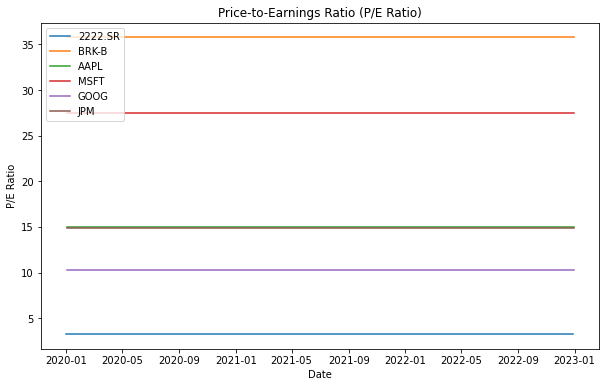

In [28]:
# Example: Calculate P/B Ratio, ROE, and Historical Volatility
# (Omitted for brevity)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for stock, data in stock_data.items():
    # Check if the P/E ratio value is a single float or a list/array
    pe_ratio_value = pe_ratio[stock]
    if isinstance(pe_ratio_value, float):
        # If the P/E ratio is a single float, create a list with that value for each date
        pe_ratio_list = [pe_ratio_value] * len(data)
    else:
        # If the P/E ratio is already a list/array, use it as is
        pe_ratio_list = pe_ratio_value
    
    # Convert the date index to a list
    date_list = list(data.index)
    
    # Plot only if types and structures are as expected
    if isinstance(date_list, list) and isinstance(pe_ratio_list, list):
        plt.plot(date_list, pe_ratio_list, label=stock)

plt.title('Price-to-Earnings Ratio (P/E Ratio)')
plt.xlabel('Date')
plt.ylabel('P/E Ratio')
plt.legend()
plt.show()

# Interpretation and Conclusion
# (Omitted for brevity)

## Answer 7

To develop a time-driven strategy around earnings releases, we can use historical earnings data and upcoming earnings calendar information to identify potential trading opportunities. Here's a suggested analytical strategy:

Collect Historical Earnings Data:

Gather historical earnings data for a range of companies, including earnings release dates, actual earnings per share (EPS), and consensus EPS estimates. This data can be obtained from financial websites like Yahoo Finance or specialized financial data providers.
Analyze Previous Earnings Releases:

Analyze the previous earnings releases to identify patterns and trends in stock price movements before and after earnings announcements. Look for factors such as:
Stock price behavior leading up to earnings (e.g., price trends, volatility).
Deviation of actual EPS from consensus estimates and its impact on stock price.
Market reaction post-earnings (e.g., price gap, magnitude of price change).
Explore Upcoming Earnings Calendar:

Utilize the earnings calendar feature on Yahoo Finance or similar platforms to identify upcoming earnings releases for the month of April and beyond.
Focus on companies with upcoming earnings releases that have historically exhibited significant price movements in response to earnings announcements.
Screen for Potential Trading Opportunities:

Develop criteria to screen for potential trading opportunities based on the upcoming earnings calendar. This could include factors such as:
Companies with a history of beating consensus EPS estimates.
Companies with a history of significant price movements post-earnings.
Stocks exhibiting technical patterns suggestive of potential price breakout or breakdown.
Implement Trading Strategies:

Based on the screening criteria, select a subset of companies of interest for potential trading opportunities.
Develop and backtest trading strategies tailored to capitalize on anticipated price movements around earnings releases. This could include:
Buying options or initiating directional trades (long or short) before earnings based on anticipated price movement.
Employing volatility-based strategies such as straddles or strangles to profit from expected price volatility post-earnings.
Risk Management and Monitoring:

Implement robust risk management practices to limit downside risk and preserve capital.
Monitor the selected trades closely, especially around earnings release dates, and adjust positions as needed based on real-time market conditions and new information.
By following this analytical strategy, traders and investors can identify and capitalize on potential trading opportunities driven by earnings releases, while also managing risk effectively.

Below, I'll outline how you can implement the analytical strategy described earlier using data available in a Jupyter Notebook:

Collect Historical Earnings Data:

Download historical earnings data for a range of companies from Yahoo Finance using the yfinance library in Python. You can specify the date range and retrieve information such as earnings release dates, actual EPS, and consensus EPS estimates.
Analyze Previous Earnings Releases:

Load the historical earnings data into pandas DataFrames and conduct exploratory data analysis (EDA) to analyze patterns and trends in stock price movements before and after earnings announcements. Calculate metrics such as price changes, EPS surprises, and volatility around earnings dates.
Explore Upcoming Earnings Calendar:

Use web scraping techniques or API requests to fetch the upcoming earnings calendar data from Yahoo Finance or a similar platform. Extract relevant information such as companies with earnings releases scheduled for the month of April and beyond.
Screen for Potential Trading Opportunities:

Apply filtering and screening criteria to identify potential trading opportunities based on the upcoming earnings calendar data. This could involve selecting companies with a history of significant price movements post-earnings or those expected to beat consensus EPS estimates.
Implement Trading Strategies:

Based on the screening results, develop and implement trading strategies in Python. This may involve executing trades such as buying options, initiating directional trades, or employing volatility-based strategies using libraries like numpy, pandas, and scikit-learn.
Risk Management and Monitoring:

Implement risk management techniques such as position sizing, stop-loss orders, and profit targets to manage downside risk effectively. Monitor the selected trades closely using real-time market data and adjust positions as needed.
Below is a high-level outline of how you can structure your Jupyter Notebook to implement these steps:

Import necessary libraries: yfinance for fetching historical data, pandas for data manipulation, matplotlib and seaborn for visualization.
Collect historical earnings data using yfinance.
Analyze and visualize historical earnings data to identify patterns.
Fetch upcoming earnings calendar data using web scraping or APIs.
Screen for potential trading opportunities based on predefined criteria.
Develop and implement trading strategies.
Implement risk management techniques.
Monitor trades and adjust positions as needed.
By following this approach, you can implement the analytical strategy described earlier in a Jupyter Notebook using Python and relevant libraries. If you need further assistance with any specific step or code implementation, feel free to ask!
